# LeNet

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [17]:
BATCH_SIZE = 32
TARGET_SIZE = (250,250)

In [18]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [19]:
train_data = train_gen.flow_from_directory(
    '/kaggle/input/garbage-classification/Garbage Classification/train',
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 1072 images belonging to 6 classes.


In [20]:
test_data = train_gen.flow_from_directory(
    '/kaggle/input/garbage-classification/Garbage Classification/test',
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 322 images belonging to 6 classes.


In [21]:
model = tf.keras.Sequential([
    layers.Conv2D(filters=6,kernel_size=(5,5),activation='tanh',input_shape=(250,250,3)),
    layers.AveragePooling2D(pool_size=(2,2),strides=2),

    layers.Conv2D(filters=16,kernel_size=(5,5),activation='tanh'),
    layers.AveragePooling2D(pool_size=(2,2),strides=2),
    
    layers.Conv2D(filters=120,kernel_size=(5,5),activation='tanh'),

    layers.Flatten(),
    layers.Dense(units=84,activation='tanh'),
    layers.Dense(units=6,activation='softmax')
    
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 246, 246, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 123, 123, 6)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 119, 119, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 59, 59, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 55, 55, 120)         │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 363000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │      30,492,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,543,586 (116.51 MB)

 Trainable params: 30,543,586 (116.51 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [25]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.2132 - loss: 3.9078 - val_accuracy: 0.1553 - val_loss: 2.3507
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.2094 - loss: 2.1605 - val_accuracy: 0.1553 - val_loss: 1.8748
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.2344 - loss: 1.8134 - val_accuracy: 0.1770 - val_loss: 1.8108
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.2202 - loss: 1.7631 - val_accuracy: 0.1553 - val_loss: 1.8356
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.2361 - loss: 1.7459 - val_accuracy: 0.1553 - val_loss: 1.8290
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.2093 - loss: 1.7756 - val_accuracy: 0.1553 - val_loss: 1.8315
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.2268 - loss: 1.7637 - val_accuracy: 0.1770 - val_loss: 1.8184
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.2498 - loss: 1.7500 - val_accuracy: 0.1553 - val_loss:

In [26]:
test_loss , test_acc = model.evaluate(test_data)

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 356ms/step - accuracy: 0.1432 - loss: 1.8433


In [28]:
print(f"Test Accuracy:{test_acc:.2f}")

Test Accuracy:0.16


In [29]:
import matplotlib.pyplot as plt

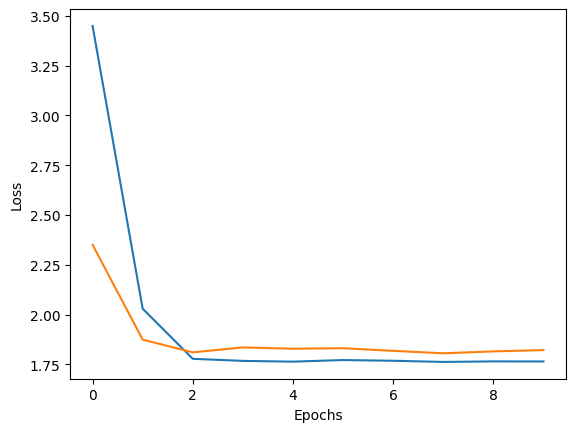

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# AlexNet

In [35]:
model = tf.keras.Sequential([
    layers.Input(shape=(250,250,3)),
    layers.Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding='valid',activation='relu'),
    layers.MaxPool2D(pool_size=(3,3),strides=(2,2),padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=(3,3),strides=(2,2),padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    layers.Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=(3,3),strides=(2,2),padding='valid'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(units=4096,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=4096,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=6,activation='softmax'),
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 60, 60, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 29, 29, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 29, 29, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 29, 29, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 14, 14, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │          24,582 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,308,358 (222.43 MB)

 Trainable params: 58,307,142 (222.42 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [36]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
history = model.fit(train_data,epochs=5,validation_data=test_data)

Epoch 1/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.2546 - loss: 8.4104 - val_accuracy: 0.1739 - val_loss: 60.5688
Epoch 2/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.3754 - loss: 1.9810 - val_accuracy: 0.2112 - val_loss: 11.9711
Epoch 3/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.4466 - loss: 1.4673 - val_accuracy: 0.2391 - val_loss: 3.8214
Epoch 4/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.4557 - loss: 1.4746 - val_accuracy: 0.1894 - val_loss: 3.4171
Epoch 5/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.5288 - loss: 1.3590 - val_accuracy: 0.1832 - val_loss: 3.5621


In [38]:
test_loss , test_acc = model.evaluate(test_data)

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 641ms/step - accuracy: 0.1692 - loss: 3.6254


In [39]:
print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 0.18


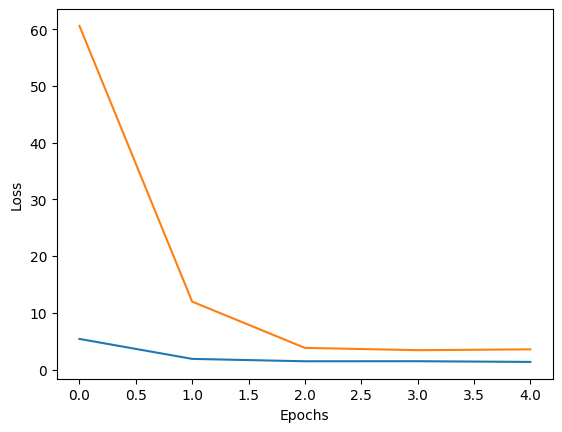

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs,loss,label='Tranining Loss')
plt.plot(epochs,val_loss,label='validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()